<h1>Introduction</h1>
<p>In these lab notes we will introduce you to Naïve Bayes and your task is to implement a relatively simple spam filter.  We will use a small data set to train and test the model (available on Blackboard). </p> 

<b>Note:</b>  Use Jupyter Notebook or Google Colab (NOT Jupyter Lab).
    
<p>The messages within the datasets have already been classified as spam, or ham (not spam). </p> 

<p>The implementation of a Naïve Bayes Spam Filter is relatively straight forward using scikit-learn, however, this library hides the implementation details (and many solutions are available on the Internet).  Therefore, this task does not permit the use of the scikit-learn library or similar libraries that perform similar tasks.  We hope that this will help with your understanding of the implementation details.</p> 
<p>Bayes Theorem can give us the probability that a message is spam S for a given event E</p>

<h1>
$P\left(S\middle|\ E\right)=\frac{P\left(E\middle|\ S\right)P\left(S\right)}{P\left(E\middle|\ S\right)P\left(S\right)+P\left(E|\lnot S\right)P\left(\lnot S\right)}$
</h1>

<p>Where:</p>
<p>$P\left(S\middle|\ E\right)$, the probability that the message is spam given the event occurred.</p>
<p>$P\left(S\right)$, the prior probability that a message is spam.</p>
<p>$P\left(\lnot S\right)$, the prior probability that a message is not spam.  </p>

Note:  $P\left(S\right)$ and $P\left(\lnot S\right)$ are prior values, or prior beliefs.  This value could be calculated using the number of spam and number of ham classifications in the data set.  You could also use arbitrary values, for example; you could assume that of all email messages sent, 80% of them are spam and 20% of them are not spam.  The success of the filter depends on the prior values.

<p>$P\left(E\middle|\ S\right)$, the probability that event E occurs in a spam emails.</p>

<p>$P\left(E|\lnot S\right)$, the probability that event E occurs in non-spam emails.</p>

<h3>Additional Libraries</h3>
<p>As you progress through the exercises you may need additional libraries that are not installed, for example when visualising the data you may need to import WordCloud.  If you use [Google Colaboratory](https://colab.research.google.com/notebooks/intro.ipynb) the necessary libraries will be available, which will save you having to pip install.  </p>
<h3>The Implementation</h3>
<p>We have tried to keep the implementation quite simple and therefore not accounted for things like filtering small often used words, nor does the implementation calculate probabilities of a word in the frequency list not appearing in spam.  We have also filtered things like telephone numbers, which could be used to identify spam.   The final exercise allows you to make recommendations how the model could be improved.    </p>


<h3>1.  Read the dataset into a dataframe and explore</h3>
<p>Start by importing pandas and read the dataset into a DataFrame named df.  Output the first 20 rows of the dataframe to get a general feel of how the data is structured.</p>
<p>You may encounter the error: UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 135-136: invalid continuation byte.  You don't need to edit the datafile,  as you should be able to successfully read in the datafile by changing the encoding to latin-1.</p>
<p>[1 Mark]</p>

In [1]:
import pandas as pd
df = pd.read_csv("spam.csv", encoding = "latin1")
df.head(20)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


<h3>2. Clean the data</h3>
<p>We are only interested in words, clean the data so that all punctuations are removed.  You should be left with a dataset that only contains alpha characters (including spaces).  You should also ensure all the words are lowercase.  Store the cleaned data into a DataFrame named clean.</p>

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Category</th>
      <th>Message</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>ham</td>
      <td>go until jurong point crazy available only in ...</td>
    </tr>
    <tr>
      <th>1</th>
      <td>ham</td>
      <td>ok lar joking wif u oni</td>
    </tr>
    <tr>
      <th>2</th>
      <td>spam</td>
      <td>free entry in  a wkly comp to win fa cup final...</td>
    </tr>
    <tr>
      <th>3</th>
      <td>ham</td>
      <td>u dun say so early hor u c already then say</td>
    </tr>
    <tr>
      <th>4</th>
      <td>ham</td>
      <td>nah i dont think he goes to usf he lives aroun...</td>
    </tr>
  </tbody>
</table>

[1 Marks]

In [2]:
# dropping and renaming columns
df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis = 1,inplace = True)
df.columns = ["Category", "Message"]
df.head(20)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [3]:
import string
import re

clean = df.copy()

# filter to alpha character
# use re library to remove non-alpha characters (not including space)
for i in range(clean["Message"].size) :
    clean.loc[i, "Message"] = re.sub(r'[^a-zA-Z\s]', '', clean.loc[i, "Message"].lower())

clean.head(20)

,Category,Message
0,ham,go until jurong point crazy available only in ...
1,ham,ok lar joking wif u oni
2,spam,free entry in a wkly comp to win fa cup final...
3,ham,u dun say so early hor u c already then say
4,ham,nah i dont think he goes to usf he lives aroun...
5,spam,freemsg hey there darling its been weeks now ...
6,ham,even my brother is not like to speak with me t...
7,ham,as per your request melle melle oru minnaminun...
8,spam,winner as a valued network customer you have b...
9,spam,had your mobile months or more u r entitled t...


<h3>3. Split the Data</h3>
<p>Split the data into three random samples, one for training the model, one for validation and the other for testing the model.  Create DataFrames named train_data, validation_data and test_data.  The train_data DataFrame should contain 60-70% of the data, validation_data 15-20% and the test_data DataFrame the remaining data.<p>  

<p>[1 Mark]</p>

In [4]:
# random state is fixed for reproducibility
randint = 420
train_data = clean.sample(frac = 0.70, random_state = randint)
clean_from_train = clean.drop(train_data.index)

validation_data = clean_from_train.sample(frac = 0.6, random_state = randint)
test_data = clean_from_train.drop(validation_data.index)

print(f"Training data size : {(train_data.size/df.size)*100:.2f}%")
print(f"Validation data size : {(validation_data.size/df.size)*100:.2f}%")
print(f"Testing data size : {(test_data.size/df.size*100):.2f}%")

Training data size : 69.99%
Validation data size : 18.00%
Testing data size : 12.01%


<h3>4. Create a Word Frequency DataFrame</h3>
<p>Create a new DataFrame named word_freq that contains each word with the number of times it appears in a spam and a ham message.  You should use the train_data.</p>
<p>Below is an example of what the DataFrame would look like, <i>note</i> that your values may differ depending on how the data was split.</p>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Word</th>
      <th>#Spam</th>
      <th>#Ham</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>0</td>
      <td>go</td>
      <td>27</td>
      <td>196</td>
    </tr>
    <tr>
      <td>1</td>
      <td>until</td>
      <td>4</td>
      <td>17</td>
    </tr>
    <tr>
      <td>2</td>
      <td>jurong</td>
      <td>1</td>
      <td>0</td>
    </tr>
    <tr>
      <td>3</td>
      <td>point</td>
      <td>1</td>
      <td>9</td>
    </tr>
    <tr>
      <td>4</td>
      <td>crazy</td>
      <td>4</td>
      <td>8</td>
    </tr>
    <tr>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
    </tr>
    <tr>
      <td>7253</td>
      <td>salesman</td>
      <td>1</td>
      <td>0</td>
    </tr>
    <tr>
      <td>7254</td>
      <td>pity</td>
      <td>1</td>
      <td>0</td>
    </tr>
    <tr>
      <td>7255</td>
      <td>soany</td>
      <td>1</td>
      <td>0</td>
    </tr>
    <tr>
      <td>7256</td>
      <td>suggestions</td>
      <td>1</td>
      <td>0</td>
    </tr>
    <tr>
      <td>7257</td>
      <td>bitching</td>
      <td>1</td>
      <td>0</td>
    </tr>
  </tbody>
</table>
<p>[2 Marks]</p>

In [5]:
# checking before counting
train_data.head()

,Category,Message
4821,spam,u r a winner u ave been specially selected re...
1350,ham,bugis oso near wat
1993,ham,eh den sat u book e kb liao huh
1630,ham,i am going to film day da at pm sorry da
4656,spam,private your account statement for shows unr...


In [6]:
# create empty dataframe
word_freq = pd.DataFrame(columns = ["Word", "#Spam", "#Ham"])
word_freq.head()

,Word,#Spam,#Ham


In [7]:
# for checking purposes
counts = 0

# count the word_frequency in spam
def count_words_spam(string_check) :
    global counts
    string_split = string_check.split(" ")

    for i in string_split :
        string_strip = i.strip()

        # making sure there is no empty spaces counted after strip
        if string_strip != "" :
            if string_strip in word_freq["Word"].values :
                word_freq.loc[word_freq["Word"] == string_strip, "#Spam"] += 1
            else :
                word_freq.loc[len(word_freq["Word"])] = [string_strip, 1, 0]
    
            # for checking purposes
            counts += 1

# filter the spam sentences
spam_filter = train_data["Category"] == "spam"
train_data_spam = train_data[spam_filter]
text_spam = " ".join(train_data_spam["Message"])

count_words_spam(text_spam)

In [8]:
# counting the word frequency in ham
def count_words_ham(string_check) :
    global counts
    string_split = string_check.split(" ")

    for i in string_split :
        string_strip = i.strip()

        # making sure there is no empty spaces counted after strip
        if string_strip != "" :
            if string_strip in word_freq["Word"].values :
                word_freq.loc[word_freq["Word"] == string_strip, "#Ham"] += 1
            else :
                word_freq.loc[len(word_freq["Word"])] = [string_strip, 0, 1]

            # for checking purposes
            counts += 1

# filter the ham sentences
ham_filter = train_data["Category"] == "ham"
train_data_ham = train_data[ham_filter]
text_ham = " ".join(train_data_ham["Message"])

count_words_ham(text_ham)

In [9]:
word_freq.head(20)

,Word,#Spam,#Ham
0,u,109,681
1,r,16,95
2,a,255,736
3,winner,13,0
4,ave,3,2
5,been,29,63
6,specially,4,0
7,selected,18,3
8,receive,22,3
9,cash,42,11


In [10]:
# checking for any missing counts
print("Manual counts : " + str(counts))
print("Counter from columns : " + str(word_freq["#Spam"].sum() + word_freq["#Ham"].sum()))

Manual counts : 57582
Counter from columns : 57582


<h3>5. Visualise the Data</h3>
<p>Let's use a Word Cloud library to visualise the most common words contained in spam messages.</p>

[Example of a Word Cloud Image](https://drive.google.com/open?id=1lVRGHtMB1AMJf-JSi7MmcHbZB_BvBhGC)

<p>[1 Marks]</p>



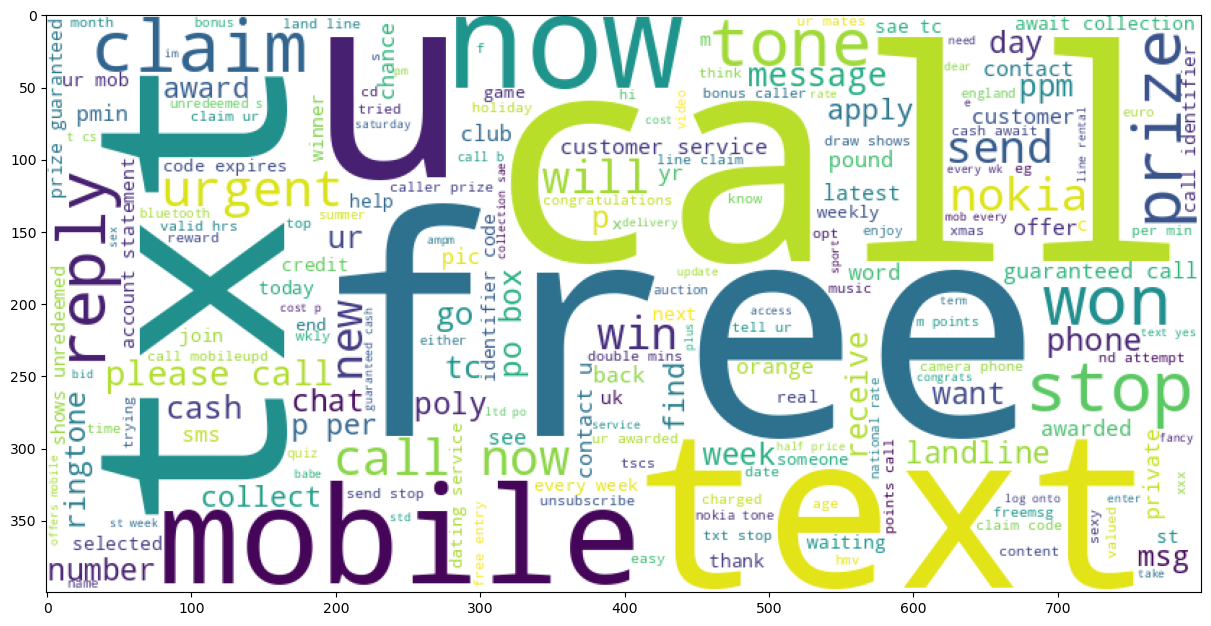

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# combine all texts from spam message
text = ' '.join(train_data_spam["Message"])

# create a WordCloud object
wordcloud = WordCloud(width = 800, height = 400, background_color='white').generate(text)
plt.figure(figsize=(15, 7.5))
plt.imshow(wordcloud)

<h3>6.  Calculate $P\left(E\middle| S\right)$ and $P\left(E|\lnot S\right)$</h3>
<p>Next create a new DataFrame named word_prob that gives the probability of each word being found in a spam and ham message.</p>
<p>To calculate the probability of a word being spam you divide the number of times the word was found in spam by the total number of spam messages, likewise to calculate the probability of each word being found in a ham message you divide the number of times the word was found in a ham message by the total number of ham messages.</p>
<p>If a word was not found in ham or spam it will cause problems later because the probability calculated will be zero. Therefore, use a pseudocount k and estimate the probability of seeing the word. This is known as smoothing and results in the following formula when k = 0.5, for example.</p>
<p>$P\left(E\middle| S\right)$ = (number of spams containing the word + k) / (total number of spam messages + 2 * k).</p>
<p>Likewise, for $P\left(E|\lnot S\right)$.</p>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Word</th>
      <th>P(E|S)</th>
      <th>P(E|¬S)</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>go</td>
      <td>0.053322</td>
      <td>0.050055</td>
    </tr>
    <tr>
      <th>1</th>
      <td>until</td>
      <td>0.011364</td>
      <td>0.004275</td>
    </tr>
    <tr>
      <th>2</th>
      <td>jurong</td>
      <td>0.002622</td>
      <td>0.000138</td>
    </tr>
    <tr>
      <th>3</th>
      <td>point</td>
      <td>0.002622</td>
      <td>0.002344</td>
    </tr>
    <tr>
      <th>4</th>
      <td>crazy</td>
      <td>0.011364</td>
      <td>0.002344</td>
    </tr>
  </tbody>
</table>
</p>[2 Marks]</p>


In [12]:
# instantiate an empty dataframe
word_prob = pd.DataFrame(columns = ["Word", "P(E|S)", "P(E|¬S)"])
word_prob.head()

,Word,P(E|S),P(E|¬S)


In [13]:
# smoothing value
k = 0.5

# approach 2 is used : count the freequency of words in the whole class
for i in word_freq["Word"].values :

    # count the probability of spam
    prob_e_s = (word_freq.loc[word_freq["Word"] == i, "#Spam"].values[0] + k ) / (word_freq["#Spam"].sum() + 2*k)
    # count the probability of not spam
    prob_e_not_s = (word_freq.loc[word_freq["Word"] == i, "#Ham"].values[0] + k ) / (word_freq["#Ham"].sum() + 2*k)

    # store in the dataframe
    word_prob.loc[len(word_prob["Word"])] = [i, prob_e_s, prob_e_not_s]

word_prob.head(20)

,Word,P(E|S),P(E|¬S)
0,u,0.009596,0.014760
1,r,0.001446,0.002068
2,a,0.022391,0.015951
3,winner,0.001183,0.000011
4,ave,0.000307,0.000054
5,been,0.002585,0.001375
6,specially,0.000394,0.000011
7,selected,0.001621,0.000076
8,receive,0.001972,0.000076
9,cash,0.003724,0.000249


<h3>7. Checking the 'spamliness' of a single word</h3>
<p>Now that we have trained the model, we will test the model.  Before we use the test_data, first let’s check how the model calculates the spamliness of a single word.  This is where we use the Bayes Theorem formula.  We have already calculated $P\left(E\middle| S\right)$ and $P\left(E|\lnot S\right)$, so we can just extract these values from the word_prob DataFrame.</p>
<p>We need to decide on the prior values $P\left(S\right)$ and $P\left(\lnot S\right)$, this is where you can experiment and tweak the model, in this example the prior value for spam was set to $0.4$ and the prior value for not spam or ham was set to $0.6$.</p>
<h3>
$P\left(S\middle|\ E\right)=\frac{P\left(E\middle|\ S\right)P\left(S\right)}{P\left(E\middle|\ S\right)P\left(S\right)+P\left(E|\lnot S\right)P\left(\lnot S\right)}$
</h3>
<pre>
Output
Word = ['free']
P(E|S) = [0.29108392]
P(E|¬S) = [0.01365141]
P(S|E) = [0.93427577]
P(¬S|E) = [0.06572423]
</pre>

<p>[2 Marks]</p>

In [14]:
# set the probability of spam to 0.5
prob_spam = 0.6
prob_ham = 1 - prob_spam

In [15]:
def prob_counter(word_to_test) :
    
    # find the P(E|S) in the dataframe
    e_given_s = word_prob.loc[word_prob["Word"] == word_to_test, "P(E|S)"].values[0]
    # find the P(E | not S) in the dataframe
    e_given_nots = word_prob.loc[word_prob["Word"] == word_to_test, "P(E|¬S)"].values[0]
    
    prob_of_spam_given = (e_given_s * prob_spam) / ((e_given_s * prob_spam) + (e_given_nots * prob_ham))
    prob_of_ham_given = (e_given_nots * prob_ham) / ((e_given_s * prob_spam) + (e_given_nots * prob_ham))
    
    print(f"Word : {word_to_test}")
    print(f"P(E|S) = {e_given_s}")
    print(f"P(E|¬S) = {e_given_nots}")
    print(f"P(S|E) = {prob_of_spam_given}")
    print(f"P(¬S|E) = {prob_of_ham_given}")
    print()

In [16]:
prob_counter("free")
prob_counter("call")
prob_counter("cock")
prob_counter("babe")
prob_counter("go")

Word : free
P(E|S) = 0.012575584961878888
P(E|¬S) = 0.0008338206311047582
P(S|E) = 0.9576680587779313
P(¬S|E) = 0.042331941222068764

Word : call
P(E|S) = 0.02265357987906406
P(E|¬S) = 0.003541030472353973
P(S|E) = 0.9056263773501
P(¬S|E) = 0.09437362264990011

Word : cock
P(E|S) = 0.00013145210761545875
P(E|¬S) = 1.082883936499686e-05
P(S|E) = 0.9479400244993487
P(¬S|E) = 0.05205997550065128

Word : babe
P(E|S) = 0.00048199106125668215
P(E|¬S) = 0.0008987936672947394
P(S|E) = 0.4457981207951584
P(¬S|E) = 0.5542018792048415

Word : go
P(E|S) = 0.0024099553062834106
P(E|¬S) = 0.0037142919021939226
P(S|E) = 0.49322172912928897
P(¬S|E) = 0.506778270870711



<h3>8. Checking the 'spamliness' of several words</h3>
<p>To check the spamliness of several words contained in a message we multiply the probabilities.  The model assumes the words appear as independent events hence the naïve Bayes.  In reality of course, words are not independent events, but the model still performs well.  So we use the assumption that the words appear independently, and hence we multiply probabilities, so
$P(S\,|\, x_1,\dots,x_n)\approx \frac{P(S)\underset{i=1}{\overset{n}{\prod}}P(x_i | S)}{P(S)\underset{i=1}{\overset{n}{\prod}}P(x_i | S)+P(\neg S)\underset{i=1}{\overset{n}{\prod}}P(x_i | \neg S)}$

Calculate the probability for each word in a message being spam, you might want to store the calculations in a list named prob_spam.  Likewise create a list for each word not being spam.
Then multiply the probabilities and compare the results.  If the result of multiplying the probabilities for spam is greater than the result of multiplying the probabilities for not spam, then you assume the message as spam.
</p>
<p>If you have a word in your message that is not in the word_prob DataFrame then you can't get the probability.  Skip any words in the message that are not in the word_prob DataFrame.</p>
<p>[2 Marks]</p>

In [17]:
def prob_spam_counter(word_to_test) :
    
    # find the P(E|S) in the dataframe
    e_given_s = word_prob.loc[word_prob["Word"] == word_to_test, "P(E|S)"].values[0]
    # find the P(E | not S) in the dataframe
    e_given_nots = word_prob.loc[word_prob["Word"] == word_to_test, "P(E|¬S)"].values[0]
    
    prob_of_spam_given = (e_given_s * prob_spam) / ((e_given_s * prob_spam) + (e_given_nots * prob_ham))
    return prob_of_spam_given

def prob_ham_counter(word_to_test) :

    # find the P(E|S) in the dataframe
    e_given_s = word_prob.loc[word_prob["Word"] == word_to_test, "P(E|S)"].values[0]
    # find the P(E | not S) in the dataframe
    e_given_nots = word_prob.loc[word_prob["Word"] == word_to_test, "P(E|¬S)"].values[0]
    
    prob_of_ham_given = (e_given_nots * prob_ham) / ((e_given_s * prob_spam) + (e_given_nots * prob_ham))
    return prob_of_ham_given

def spam_determine(message) :
    split_message = message.split(" ")
    prob_spam_ind = []
    prob_ham_ind = []

    for words in split_message :
        words = words.strip()
        if words in word_prob["Word"].values :
            if words != "" :
                prob_spam_ind.append(prob_spam_counter(words))
                prob_ham_ind.append(prob_ham_counter(words))

    prob_spam_counted = 1
    prob_ham_counted = 1

    for i in prob_spam_ind :
        prob_spam_counted = prob_spam_counted * i

    for i in prob_ham_ind :
        prob_ham_counted = prob_ham_counted * i

    if (prob_ham_counted > prob_spam_counted) :
        print (f"It's a ham !! Prob = {prob_ham_counted}")
        return False
    else :
        print(f"It's a spam !! Prob = {prob_spam_counted}")
        return True

In [18]:
spam_determine("go until jurong point crazy available only")

It's a spam !! Prob = 0.008006898058279149


True

In [19]:
spam_determine("urgent you have won a week free membership")

It's a spam !! Prob = 0.10798569408529476


True

<h3>9. Avoiding floating point underflow</h3>
<p>Our aim is to compare two probabilities $P(S|x_1,\dots,x_n)$ with $P(\neg S|x_1,\dots,x_n),$ according to our model introduced in Section 8, both probabilities share a common denominator which does not affect comparison. Hence we will calculate numerators only, which are proportional to $P(S|x_1,\dots,x_n)$ and $P(\neg S|x_1,\dots,x_n).$
</p>

<p>Multiplying a set of small probabilities could result in a floating-point error.  This is where the product becomes too small to be represented correctly.  To avoid this we can take the logarithm of the probabilities and add them.  

To avoid multiplication of small numbers, we use the following property of $\log(x):$</p>
$$
\log(a\cdot b)=\log(a)+\log(b)
$$
<p>i.e. the log of the product is equal to the sum of logs (so instead of multiplying small numbers we will add them):</p>
$$
P(S|x_1,x_2,\dots,x_n)\propto P(S)\cdot P(x_1|S)\cdot \dots \cdot P(x_n|S)$$
<p>becomes</p>
$$\log(P(S|x_1,x_2,\dots,x_n))\propto \log\left(P(S)\cdot P(x_1|S)\cdot \dots  P(x_n|S)\right)=$$ $$
\log(P(S))+\log(P(x_1|S))+\dots+\log(P(x_n|S))
$$
<p>So, to check spam or ham we just compare:</p>
$$
\log(P(S))+\log(P(x_1|S))+\dots+\log(P(x_n|S))
$$
<p>and </p>
$$
\log(P(\neg S))+\log(P(x_1|\neg S))+\dots+\log(P(x_n|\neg S))
$$


Change the equation so that logs are used.
</p>
<p>[2 Mark]</p>

In [20]:
import math

def spam_determine_log(message) :
    message_split = message.split(" ")
    prob_spam_ind = []
    prob_ham_ind = []

    for word_to_test in message_split :
        word_to_test = word_to_test.strip()
        if word_to_test in word_prob["Word"].values :
            prob_spam_ind.append(word_prob.loc[word_prob["Word"] == word_to_test, "P(E|S)"].values[0])
            prob_ham_ind.append(word_prob.loc[word_prob["Word"] == word_to_test, "P(E|¬S)"].values[0])

    prob_spam_counted = math.log(prob_spam)
    prob_ham_counted = math.log(prob_ham)

    for i in prob_spam_ind :
        prob_spam_counted += math.log(i)

    for i in prob_ham_ind :
        prob_ham_counted += math.log(i)

    # the probability is meaning at this point it's not normalised
    if (prob_spam_counted > prob_ham_counted) :
        # print(f"It's a spam !! Prob = {prob_spam_counted}")
        return True
    else :
        # print(f"It's a ham !! Prob = {prob_ham_counted}")
        return False

In [21]:
spam_determine_log("go until jurong point crazy available only")

False

In [22]:
spam_determine_log("urgent you have won a week free membership")

True

<h3>10. Testing the Model</h3>
<p>Now that we have tested the model using simple messages.  Let’s test the model using the messages from the test_set.  You should implement counters that displays how your model has performed and calculate the accuracy of the model.</p>
<pre>
match_spam 173
match_ham 843
thought_ham_is_spam 3
thought_spam_is_ham 357
Accuracy: 0.7383720930232558
</pre>
<p>[3 Marks]</p>


In [23]:
def metric_calculation(dataframe_test) :
    match_spam = 0
    match_ham = 0
    thought_ham_is_spam = 0
    thought_spam_is_ham = 0

    # filter through the dataframe
    ham_filter = dataframe_test["Category"] == "ham"
    test_data_ham = dataframe_test[ham_filter]
    
    spam_filter = dataframe_test["Category"] == "spam"
    test_data_spam = dataframe_test[spam_filter]

    # test spam first
    for i in test_data_spam["Message"].values :
        if spam_determine_log(i) :
            match_spam += 1
        else :
            thought_ham_is_spam += 1

    # test ham
    for i in test_data_ham["Message"].values :
        if spam_determine_log(i) :
            thought_spam_is_ham += 1
        else :
            match_ham += 1

    print(f"Match spam : {match_spam}")
    print(f"Match ham : {match_ham}")
    print(f"Thought ham, is spam : {thought_ham_is_spam}")
    print(f"Thought spam, is ham : {thought_spam_is_ham}")
    print(f"Accuracy : {(match_spam + match_ham) / (match_spam + match_ham + thought_ham_is_spam + thought_spam_is_ham)}")

In [24]:
metric_calculation(test_data)

Match spam : 72
Match ham : 564
Thought ham, is spam : 2
Thought spam, is ham : 31
Accuracy : 0.9506726457399103


<h3>11. Improvements</h3>
<p>Utilise the validation set to assess the performance of various word sets in classifying spam and non-spam (ham) emails. Compare the effectiveness of different sets of words to determine their impact on classification accuracy.</p>
<p>[3 Mark]</p>

### Method : Generate different sets of dataframe from validation set with the same size and use that to run the metrics multiple times, checking for accuracy consistency

In [25]:
# fix the random state for reproducibility
valid_one = validation_data.sample(frac = 0.6, random_state = 420)
valid_two = validation_data.sample(frac = 0.6, random_state = 11)
valid_three = validation_data.sample(frac = 0.6, random_state = 601)
valid_four = validation_data.sample(frac = 0.6, random_state = 37)
valid_five = validation_data.sample(frac = 0.6, random_state = 690)

In [26]:
metric_calculation(valid_one)

Match spam : 75
Match ham : 494
Thought ham, is spam : 3
Thought spam, is ham : 30
Accuracy : 0.9451827242524917


In [27]:
metric_calculation(valid_two)

Match spam : 67
Match ham : 503
Thought ham, is spam : 5
Thought spam, is ham : 27
Accuracy : 0.946843853820598


In [28]:
metric_calculation(valid_three)

Match spam : 74
Match ham : 493
Thought ham, is spam : 3
Thought spam, is ham : 32
Accuracy : 0.9418604651162791


In [29]:
metric_calculation(valid_four)

Match spam : 78
Match ham : 495
Thought ham, is spam : 3
Thought spam, is ham : 26
Accuracy : 0.9518272425249169


In [30]:
metric_calculation(valid_five)

Match spam : 75
Match ham : 495
Thought ham, is spam : 2
Thought spam, is ham : 30
Accuracy : 0.946843853820598


From the 5 different sets obtained from the validation, it is seen that the accuracy is consistent throughout, obtaining well above 90% for each set of the same size

### Method : Using different prob_spam in the model to different sets

In [31]:
# setting to 0.7
prob_spam = 0.7
prob_ham = 0.3

print(prob_spam)
print(prob_ham)

0.7
0.3


In [32]:
metric_calculation(valid_one)

Match spam : 75
Match ham : 489
Thought ham, is spam : 3
Thought spam, is ham : 35
Accuracy : 0.9368770764119602


In [33]:
metric_calculation(valid_two)

Match spam : 67
Match ham : 500
Thought ham, is spam : 5
Thought spam, is ham : 30
Accuracy : 0.9418604651162791


In [34]:
metric_calculation(valid_three)

Match spam : 74
Match ham : 487
Thought ham, is spam : 3
Thought spam, is ham : 38
Accuracy : 0.9318936877076412


In [35]:
metric_calculation(valid_four)

Match spam : 78
Match ham : 491
Thought ham, is spam : 3
Thought spam, is ham : 30
Accuracy : 0.9451827242524917


In [36]:
metric_calculation(valid_five)

Match spam : 75
Match ham : 491
Thought ham, is spam : 2
Thought spam, is ham : 34
Accuracy : 0.9401993355481728


The accuracy of the model decreased slightly when prob_spam increased to 0.7 (and consequently prob_ham to 0.3), reducing the reliability of the model in predicting spam messages

In [37]:
# setting to 0.4
prob_spam = 0.4
prob_ham = 0.6

print(prob_spam)
print(prob_ham)

0.4
0.6


In [38]:
metric_calculation(valid_one)

Match spam : 75
Match ham : 504
Thought ham, is spam : 3
Thought spam, is ham : 20
Accuracy : 0.9617940199335548


In [39]:
metric_calculation(valid_two)

Match spam : 66
Match ham : 514
Thought ham, is spam : 6
Thought spam, is ham : 16
Accuracy : 0.9634551495016611


In [40]:
metric_calculation(valid_three)

Match spam : 73
Match ham : 504
Thought ham, is spam : 4
Thought spam, is ham : 21
Accuracy : 0.9584717607973422


In [41]:
metric_calculation(valid_four)

Match spam : 77
Match ham : 504
Thought ham, is spam : 4
Thought spam, is ham : 17
Accuracy : 0.9651162790697675


In [42]:
metric_calculation(valid_five)

Match spam : 74
Match ham : 506
Thought ham, is spam : 3
Thought spam, is ham : 19
Accuracy : 0.9634551495016611


The average accuracy of the model given that prob_spam = 0.4 is higher than the original model (every sets is greater than 0.95), indicating that the optimum value of prob_spam is lower than 0.5

### Comparison table across different parameters and set

#### NOTE : prob_ham = 1 - prob_spam
| Sets | prob_spam = 0.4 | prob_spam = 0.5 | prob_spam = 0.7 |
| :- | :- | :- | :- |
| valid_one | 0.9617940199335548 | 0.9451827242524917 | 0.9368770764119602 |
| valid_two | 0.9634551495016611 | 0.946843853820598 | 0.9418604651162791 |
| valid_three | 0.9584717607973422 | 0.9418604651162791 | 0.9318936877076412 |
| valid_four | 0.9651162790697675 | 0.9518272425249169 | 0.9451827242524917 |
| valid_five | 0.9634551495016611 | 0.946843853820598 | 0.9401993355481728 |

The model can be finely tuned by changing the global variable (prob_spam and prob_ham) to find the best accuracy / best use case

In [43]:
# setting to 0.6 to the original model
prob_spam = 0.6
prob_ham = 0.4

print(prob_spam)
print(prob_ham)

metric_calculation(valid_one)

0.6
0.4
Match spam : 75
Match ham : 494
Thought ham, is spam : 3
Thought spam, is ham : 30
Accuracy : 0.9451827242524917


### Conclusion : From the Leave-One-Out Validation, we can see that the lowest probability of spam (0.4) gives the highest accuracy on the predictions